# NN Learning

We can solve for gradients in a vectorized manner. 

A function $\mathbf{f}: R^n \xrightarrow{} R^m$ exists such that $\mathbf{f}(\mathbf{x}) = [f_1(x_1, ..., x_n), f_2(x_1, ..., x_n), ..., f_m(x_1, ..., x_n)]$. Its jacobian can be calculated as

$$\frac{d\mathbf{f}}{d\mathbf{x}} = 
A = \begin{bmatrix} 
    \frac{df_1}{dx_1} & \dots & \frac{df_1}{dx_n} \\
    \vdots & \ddots & \vdots \\
    \frac{df_m}{dx_1} & \dots  & \frac{df_m}{dx_b} \\
    \end{bmatrix}
$$

In other words, $(\frac{d\mathbf{f}}{d\mathbf{x}})_{ij} = \frac{df_i}{dx_j}$. This jacobian is useful for the application of chain rule to a vector-valued function just by multiplying jacobians.

For example, suppose we have a function $\mathbf{f}(x) = [f_1(x), f_2(x)]$ taking a scaler to a vector of size 2 and a function $\mathbf{g}(\mathbf{y}) = [g_1(y_1, y_2), g_2(y_1, y_2)]$ taking a vector of size two to a vector of size 2. Now let's compose them to get $\mathbf{g}(x) = [g_1(f_1(x), f_2(x)), g_2(f_1(x), f_2(x))]$. Using the regular chain rule, we can compute the derivative of $\mathbf{g}$ as the Jacobian

$$\frac{d\mathbf{g}}{dx} = \begin{bmatrix}
\mathbf{d}{dx} g_1(f_1(x), f_2(x)) \\
\mathbf{d}{dx} g_2(f_1(x), f_2(x)) \\
\end{bmatrix}
= \begin{bmatrix}
\frac{d g_1}{d f_1} \frac{d f_1}{dx} + \frac{d g_1}{d f_2} \frac{d f_2}{dx} \\
\frac{d g_2}{d f_1} \frac{d f_1}{dx} + \frac{d g_2}{d f_2} \frac{d f_2}{dx} \\
\end{bmatrix}
$$

This is the same as multiplying the two jacobians.

$$\frac{d\mathbf{g}}{dx} = \frac{d\mathbf{g}}{d\mathbf{f}} \frac{d\mathbf{f}}{dx} = \begin{bmatrix}
\frac{d g_1}{d f_1} & \frac{d g_1}{d f_2}\\
\frac{d g_2}{d f_1} & \frac{d g_2}{d f_2}\\
\end{bmatrix}
\begin{bmatrix}
\frac{d f_1}{dx}\\
\frac{d f_2}{dx}\\
\end{bmatrix}
$$

## Useful Identities

**Matrix times column vector wrt the column vector**

$\mathbf{z} = \mathbf{W} \mathbf{x}$, what is $\frac{d\mathbf{z}}{d\mathbf{x}}$?

Suppose $\mathbf{W} \in R^{n \times m}$, then we can think of z as a function of \mathbf{x} taking an $m$-dimensional vector to an $n$-dimensional vector. So, its Jacobian will be $n \times m$. Note that

$$z_i = \sum_{k=1}^m W_{ik} x_{k}$$

An entry $(\frac{d\mathbf{f}}{d\mathbf{x}})_{ij}$ of the Jacobian will be

$$(\frac{d\mathbf{f}}{d\mathbf{x}})_{ij} = \frac{d z_i}{d x_j} \frac{d}{d x_j} \sum_{k=1}^m W_{ik} x_k = \sum_{k=1}^m W_{ik} \frac{d}{d x_j} x_k = W_{ij}$$

because $\frac{d}{d x_j} x_k = 1$ if $k = j$ and 0 if otherwise. So, we see that $\frac{d \mathbf{z}}{d \mathbf{x}} = \mathbf{W}$.

**Row vector times matrix wrt the row vector**

$\mathbf{z} = \mathbf{x} \mathbf{W}$, what is $\frac{d \mathbf{z}}{d \mathbf{x}}$?

A computation similar to the one above shows that $\frac{d \mathbf{z}}{d \mathbf{x}} = \mathbf{W}^T$.

**A vector with itself**

$\mathbf{z} = \mathbf{x}$, what is $\frac{d \mathbf{z}}{d \mathbf{x}}$?

We have $z_i = x_i$, so

$$(\frac{d\mathbf{f}}{d\mathbf{x}})_{ij} = \frac{d z_i}{d x_j} = \frac{d}{d x_j} x_i = \begin{cases}
  1 & if $i=j$\\
  0 & if otherwise\\
\end{cases}$$

So we see that the Jacobian $\frac{d\mathbf{z}}{d \mathbf{x}}$ is a diagonal matrix where the entry at $(i, i)$ is 1. This is just the identity matrix: $\frac{d\mathbf{z}}{d \mathbf{x}} = \mathbf{I}$. When applying the chain rule, this term will disappear because a matrix or vector multiplied by the identity matrix does not change.

**An elementwise function applied a vector**

$\mathbf{z} = f(\mathbf{x})$, what is $\frac{d \mathbf{z}}{d \mathbf{x}}$?

Since $f$ is being applied elementwise, we have $z_i = f(x_i)$. So, 

$$(\frac{d\mathbf{f}}{d\mathbf{x}})_{ij} = \frac{d z_i}{d x_j} = \frac{d}{d} f(x_i) = \begin{cases}
$f^\prime (x_i)$ & if $i=j$\\
0 & if otherwise \\
\end{cases}$$

So we see that the jacobian $\frac{d\mathbf{z}}{d\mathbf{x}}$ is a diagonal matrix where the entry at $(i,i)$ is the derivative of $f$ applied to $x_i$. We can write this as $\frac{d \mathbf{z}}{d \mathbf{x}} = diag( f^\prime (\mathbf{x}))$. Since multiplication by a diagonal matrix is the same as doing elementwise multiplication by the diagonal, we could also write $\circ f^\prime (\mathbf{x})$ when applying the chain rule.

**Matrix times column vector wrt the matrix**

$\mathbf{z} = \mathbf{W} \mathbf{x}$, $\mathbf{\delta} = \frac{d J}{d z}$ what is $\frac{dJ}{d\mathbf{W}} = \frac{d J}{d \mathbf{z}} \frac{d \mathbf{z}}{d \mathbf{W}} = \delta \frac{d \mathbf{z}}{d \mathbf{W}}$?

Suppose we ahve a loss function $J$ (a scalar) and are computing its gradient wrt a matrix $\mathbf{W} \in R^{n \times m}$. Then we could think of $J$ as a function of $\mathbf{W}$ taking $n m$ inputs (the entries of $\mathbf{W}$) to a single output ($J$). This means the Jacobian $\frac{d J}{d \mathbf{W}}$ would be a $1 \times nm$ vector. But in practice this is not a very useful way of arranging the gradient. It would be much nicer if hte derivatives were in a $n \times m$ matrix like this: 

$$\frac{d\mathbf{f}}{d\mathbf{x}} = 
\begin{bmatrix} 
    \frac{d J}{d W_{11}} & \dots & \frac{d J}{d W_{1 m}} \\
    \vdots & \ddots & \vdots \\
    \frac{d J}{d W_{n1}} & \dots  & \frac{d J}{d W_{nm}} \\
    \end{bmatrix}
$$

Since this matrix has the same shape as $\mathbf{W}$, we could just subtract it (times the learning rate) from $\mathbf{W}$ when doing gradient descent. So (in a slight abuse of notation) let's find this matrix as $\frac{d J}{d \mathbf{W}}$ instead.

This way of arranging the gradients becomes complicated when computing $\frac{d \mathbf{z}}{d \mathbf{W}}$. Unlike $J$, $\mathbf{z}$ is a vector. So if we are trying to rearrange the gradients like with $\frac{d J}{d \mathbf{W}}$, $\frac{d \mathbf{z}}{d \mathbf{W}}$ would be an $n \times m \times n$ tensor! Luckily, we can avoid the issue by taking the gradient wrt a single weight $W_{ij}$ instead. $\frac{d \mathbf{z}}{d W_{ij}}$ is just a vector, which is much easier to deal with. We have 

$$z_k = \sum_{l=1}^m W_{kl} x_l$$

$$\frac{d z_k}{d W_{ij}} = \sum_{l=1}^m x_l \frac{d}{d W_{ij}} W_{kl}$$

Note that $\frac{d}{d W_{ij}} W_{kl} = 1$ if $i=k$ and $j=l$ and 0 if otherwise.  So if $k \neq i$ everything in the sum is zero and the gradient is zero. Otherwise, the only nonzero element of hte sum is when $l=j$, so we just get $x_j$. Thus we find $\frac{d z_k}{d W_{ij}} = x_j$ if $k = i$ and 0 if otherwise. Another way of writing this is

$$\frac{d \mathbf{z}}{d \mathbf{W}_{ij}} = \begin{bmatrix}
0\\
\vdots \\
0\\
x_j\\
0\\
\vdots\\
0\\
\end{bmatrix}$$

Here, the $x_j$ is located in the $i$th element.

Now let's compute $\frac{d J}{d W_{ij}}$

$$\frac{d J}{d W_{ij}} = \frac{d J}{d z} \frac{dz}{d W_{ij}} = \mathbf{\delta} \frac{d z}{d W_{ij}} = \sum_{k=1}^m d_k \frac{d z_k}{d W_{ij}} = \delta_{i} x_j$$

The only nonzero term in the sum is $\delta_i \frac{d z_i}{d W_{ij}}$.  To get $\frac{d J}{d \mathbf{W}}$ we want a matrix where entry $(i, j)$ is $\delta_i x_j$. This matrix is equal to the outer product $\frac{d J}{d \mathbf{W}} = \delta^T x^T$.

**Row vector time matrix wrt the matrix**

$\mathbf{z} = \mathbf{x} \mathbf{W}$, $\mathbf{\delta} = \frac{d J}{d z}$ what is $\mathbf{d J}{d \mathbf{W}} = \delta \frac{d \mathbf{z}}{d \mathbf{W}}$?

A similar computation to the one above shows $\frac{d J}{d \mathbf{W}} = \mathbf{x}^T \delta$.

**Cross-entropy loss wrt logits**

$\mathbf{\hat{y}} = \hbox{softmax}(\mathbf{\theta}), J = CE(\mathbf{y}, \mathbf{\hat{y}})$, what is $\frac{d J}{d \mathbf{\theta}}$?

The gradient is $\frac{d J}{d \mathbf{\theta}} = \mathbf{\hat{y}} - \mathbf{y}$, or $(\mathbf{\hat{y}} - \mathbf{y})^T$ if $\mathbf{y}$ is a column vector.

These identities will be enough to let you quickly compute the gradients for many neural networks. 

## Gradient layout

Jacobean formulation is great for applying the chain rule: simply multiply the Jacobians. However, when doing SGD it's more convenient to follow the convention "the shape of the gradient equals the shape of the parameter" (as done when computing $\frac{d J}{d \mathbf{W}}$) That way subtracting the gradient times the learning rate from the parameters is easy.

## Example on 1-layer NN

We compute the gradients of a full neural network with one-layer and cross-entropy loss.

The forward pass is as follows:

$$\mathbf{x} = \hbox{input}$$

$$\mathbf{z} = \mathbf{W} \mathbf{x} + \mathbf{b_1}$$

$$\mathbf{h} = \hbox{ReLU}(\mathbf{z})$$

$$\mathbf{\theta} = \mathbf{U} \mathbf{h} + \mathbf{b_2}$$

$$\mathbf{\hat{y}} = \hbox{softmax}(\mathbf{\theta})$$

$$J = \hbox{CE}(\mathbf{y}, \mathbf{\hat{y}})$$

It helps to break up the model into the simplest parts possible, so note that we defined $\mathbf{z}$ and $\mathbf{\theta}$ to split up the activation functions from the linear transformations in the network's layers. The dimensions of the model's parameters are

$$\mathbf{x} \in R^{D_x \times 1}$$

$$\mathbf{b_1} \in R^{D_h \times 1}$$

$$\mathbf{W} \in R^{D_h \times D_x}$$

$$\mathbf{b_2} \in R^{N_c \times 1}$$

$$\mathbf{U} \in R^{N_c \times D_h}$$

where $D_x$ is the size of our input, $D_h$ is the size of our hidden layer, and $N_c$ is the number of classes.

In this example, we will compute all of the network's gradients: $\frac{d J}{d \mathbf{U}}$, $\frac{d J}{d \mathbf{b_2}}$, $\frac{d J}{d \mathbf{W}}$, $\frac{d J}{d \mathbf{b_1}}$, $\frac{d J}{d \mathbf{x}}$

To start with, recall that ReLU($x$) = max($x, 0$). This means

$$ReLU^\prime (x) = \begin{cases}
1 & \hbox{if} x > 0\\
0 & \hbox{if otherwise} \\
\end{cases} = \hbox{sgn}(\hbox{ReLU}(x))$$

where sgn is the signum function. Note that we are able to write the derivative of the activation in terms of the activation itself.

Now let's write out the chain rule for $\frac{d J}{d \mathbf{U}}$ and $\frac{d J}{d \mathbf{b_2}}$:

$$\frac{d J}{d \mathbf{U}} = \frac{d J}{d \mathbf{\hat{y}}} \frac{d \mathbf{\hat{y}}}{d \mathbf{\theta}} \frac{d \mathbf{\theta}}{d \mathbf{U}}$$

$$\frac{d J}{d \mathbf{b_2}} = \frac{d J}{d \mathbf{\hat{y}}} \frac{d \mathbf{\hat{y}}}{d \mathbf{\theta}} \frac{d \mathbf{\theta}}{d \mathbf{b_2}}$$

Notice that $\frac{d J}{d \mathbf{\hat{y}}} \frac{d \mathbf{\hat{y}}}{d \mathbf{\theta}} = \frac{d J}{d \mathbf{\theta}}$ is present in both gradients. This makes the math a bit cumbersome. Even worse, if we're implementing the model without automatic differentiation, computing $\frac{d J}{d \mathbf{\theta}}$ twice will be inefficient. So it will help us to define some variables to represent the intermediate derivatives:

$$\mathbf{\delta_1} = \frac{d J}{d \mathbf{\theta}}$$

$$\mathbf{\delta_2} = \frac{d J}{d \mathbf{z}}$$

These are the error signals passed down to $\mathbf{\theta}$ and $\mathbf{z}$ when doing backpropagation. We can compute them as follows:

Per cross-entropy loss wrt logits, 

$$\mathbf{\delta_1} = \frac{d J}{d \mathbf{\theta}} = (\mathbf{\hat{y}} - \mathbf{y})^T$$

Using the chain rule, 

$$\mathbf{\delta_2} = \frac{d J}{d \mathbf{z}} = \frac{d J}{d \mathbf{\theta}} \frac{d \mathbf{\theta}}{d \mathbf{h}} \frac{d \mathbf{h}}{d \mathbf{z}}$$

Substituting in $\mathbf{\delta_1}$, 

$$= \mathbf{\delta_1} \frac{d \mathbf{\theta}}{d \mathbf{h}} \frac{d \mathbf{h}}{d \mathbf{z}}$$

Using matrix times column vector wrt column vector,

$$= \mathbf{\delta_1} \mathbf{U} \frac{d \mathbf{h}}{d \mathbf{z}}$$

Using elementwise function applied to a vector,

$$= \mathbf{\delta_1} \mathbf{U} \circ \hbox{ReLU}^\prime (\mathbf{z})$$

$$= \mathbf{\delta_1} \mathbf{U} \circ \hbox{sgn}(\mathbf{h})$$

These final objects have the following sizes: $\frac{d J}{d \mathbf{z}}$ is ($1 \times D_h$), $\mathbf{\delta_1}$ is ($1 \times N_c$), $\mathbf{U}$ is ($N_c \times D_h$), and $sgn(\mathbf{h})$ is ($D_h$, ).

The error terms can be utilized to compute the gradients. 

Using the property that the matrix times column vector wrt matrix,

$$\frac{d J}{d \mathbf{U}} = \frac{d J}{d \mathbf{\theta}} \frac{d \mathbf{\theta}}{d \mathbf{U}} = \mathbf{\delta_1} \frac{d \mathbf{\theta}}{d \mathbf{U}} = \mathbf{\delta_1}^T \mathbf{h}^T$$

Using identity matrix and transposing

$$\frac{d J}{d \mathbf{b_2}} = \frac{d J}{d \mathbf{\theta}} \frac{d \mathbf{\theta}}{d \mathbf{b_2}} = \mathbf{\delta_1} \frac{d \mathbf{\theta}}{d \mathbf{b_2}} = \mathbf{\delta_1}^T$$

Using the property that the matrix times column vector wrt matrix,

$$\frac{d J}{d \mathbf{W}} = \frac{d J}{d \mathbf{\theta}} \frac{d \mathbf{z}}{d \mathbf{W}} = \mathbf{\delta_2} \frac{d \mathbf{z}}{d \mathbf{W}} = \mathbf{\delta_2}^T \mathbf{x}^T$$

Using identity matrix and transposing

$$\frac{d J}{d \mathbf{b_1}} = \frac{d J}{d \mathbf{\theta}} \frac{d \mathbf{z}}{d \mathbf{b_1}} = \mathbf{\delta_2} \frac{d \mathbf{z}}{d \mathbf{b_1}} = \mathbf{\delta_2}^T$$

Using matrix times column vector wrt column vector and transposing

$$\frac{d J}{d \mathbf{x}} = \frac{d J}{d \mathbf{\theta}} \frac{d \mathbf{z}}{d \mathbf{x}} = ( \mathbf{\delta_2}^T \mathbf{W})^T$$




The below example shows the use of backpropagation on a linear regression problem. As a note, this method can be solved (easier, perhaps) with least squares linear algebra.

Starting gradient descent at b = 0, m = 0, error = 2.059703523518794
Running...
After 1000 iterations b = -3.2643663545390273, m = -1.3386872077957057, error = 0.11444715957515363


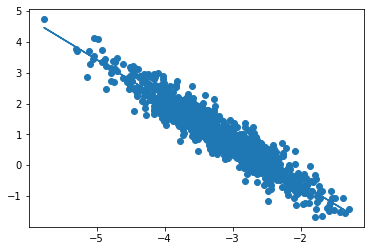

In [36]:
from numpy import *
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]

        # Calculate gradient with partial derivatives
        m_gradient += -x * (y - (m_current * x + b_current))
        b_gradient += -(y - (m_current * x + b_current))

    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def gen_data():
    
    n_samples = 1000
    random_state = 170
    X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=1)

    # Anisotropicly distributed data to stretch the blobs
    transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
    X_aniso = dot(X, transformation)
    return X_aniso

def run():
    points = gen_data()

    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 1000
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))

    plt.scatter(points[:,0], points[:,1])
    plt.plot(points[:,0], m*points[:,0] + b)
    plt.show()

run()

### Rules of thumb for neural networks

1. Batch normalization standardizes the inputs (or activations of a prior layer or inputs directly), offering some regularization effect and reducing generalization error, perhaps no longer requiring the use of dropout for regularization. It can halve the epochs or better. Do not use dropout and batch normalization at the same time.
2. The number of hidden layers in a neural network $N_h = \frac{N_s}{\alpha \times (N_i + N_o)}$ where $\alpha$ is an arbitrary scaling factor (usually 2 through 10) which symbolizes the number of nonzero weights for each neuron (which is smaller when including dropout layers), $N_i$ is the number of input neurons, $N_o$ is the number of output neurons, and $N_s$ number of samples in a training data set.

